In [1]:
# CDS API
import cdsapi

# Libraries for working with multidimensional arrays
import numpy as np
import xarray as xr
import cfgrib

# Libraries for plotting and visualising data
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

# Disable warnings for data download via API
import urllib3
urllib3.disable_warnings()

C:\Users\doria\anaconda3\envs\DEEP LEARNING\lib\site-packages\gribapi\__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.26.0
  warnings.warn(


In [2]:
ds = xr.open_dataset('download3.grib', engine='cfgrib', backend_kwargs={'filter_by_keys': {'edition': 1}})

skipping variable: paramId==49 shortName='fg10'
Traceback (most recent call last):
  File "C:\Users\doria\anaconda3\envs\DEEP LEARNING\lib\site-packages\cfgrib\dataset.py", line 680, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "C:\Users\doria\anaconda3\envs\DEEP LEARNING\lib\site-packages\cfgrib\dataset.py", line 611, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='time' value=Variable(dimensions=('time',), data=array([1640995200, 1641016800, 1641038400, 1641060000, 1642291200,
       1642312800, 1642334400, 1642356000, 1643673600, 1643695200,
       1643716800, 1643738400, 1644969600, 1644991200, 1645012800,
       1645034400, 1646092800, 1646114400, 1646136000, 1646157600,
       1647388800, 1647410400, 1647432000, 1647453600, 1648771200,
       1648792800, 1648814400, 1648836000, 1650067200, 1650088800,
       1650110400, 1650132000, 1651363200, 1651384800, 1651406400,
       16514

In [3]:
# Create Xarray Data Array
da = ds['t2m']

In [4]:
da

<xarray.DataArray 't2m' (time: 96, latitude: 9, longitude: 9)>
[7776 values with dtype=float32]
Coordinates:
    number               int32 ...
  * time                 (time) datetime64[ns] 2022-01-01 ... 2022-12-16T18:0...
    step                 timedelta64[ns] ...
    surface              float64 ...
  * latitude             (latitude) float64 38.0 37.75 37.5 ... 36.5 36.25 36.0
  * longitude            (longitude) float64 127.0 127.2 127.5 ... 128.8 129.0
    valid_time           (time) datetime64[ns] ...
    depthBelowLandLayer  float64 ...
    entireAtmosphere     float64 ...
Attributes: (12/30)
    GRIB_paramId:                             167
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      81
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           2t
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            unknown

In [5]:
da_degc = da - 273.15

In [6]:
da_degc = da_degc.assign_attrs(da.attrs)
da_degc.attrs['units'] = '° C'

In [5]:
import pandas as pd
df = ds.to_dataframe().reset_index()
df

,time,latitude,longitude,number,step,surface,valid_time,u100,v100,u10n,...,p66.162,p78.162,p76.162,p72.162,p61.162,p62.162,p54.162,p60.162,p63.162,swvl1
0,2022-01-01 00:00:00,38.0,127.00,0,0 days,0.0,2022-01-01 00:00:00,-0.398209,-0.315125,-0.485321,...,-53476.625,-0.002308,-1.594799e+10,-26.867432,2.532435e+09,2.542505e+09,2501724.0,2.514404e+09,2.547636e+09,0.445340
1,2022-01-01 00:00:00,38.0,127.25,0,0 days,0.0,2022-01-01 00:00:00,0.145737,-0.059265,-0.109344,...,-52628.625,-0.002735,-1.575925e+10,-23.179932,2.503107e+09,2.512063e+09,2461660.0,2.474066e+09,2.517195e+09,0.393689
2,2022-01-01 00:00:00,38.0,127.50,0,0 days,0.0,2022-01-01 00:00:00,0.549057,0.033508,0.352570,...,-51572.625,-0.003132,-1.550759e+10,-18.929932,2.491180e+09,2.499120e+09,2445532.0,2.457748e+09,2.504252e+09,0.365400
3,2022-01-01 00:00:00,38.0,127.75,0,0 days,0.0,2022-01-01 00:00:00,0.633041,0.510071,0.490265,...,-50228.625,-0.003468,-1.517624e+10,-14.679932,2.483479e+09,2.490469e+09,2435260.0,2.447295e+09,2.495568e+09,0.333692
4,2022-01-01 00:00:00,38.0,128.00,0,0 days,0.0,2022-01-01 00:00:00,0.869370,1.017883,0.481476,...,-48596.625,-0.003742,-1.476100e+10,-11.242432,2.459886e+09,2.465959e+09,2403324.0,2.415150e+09,2.471058e+09,0.333676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7771,2022-12-16 18:00:00,36.0,128.00,0,0 days,0.0,2022-12-16 18:00:00,3.642746,-2.031570,2.535751,...,115405.875,0.084276,3.892301e+10,34.351318,2.473745e+09,2.487386e+09,2422650.0,2.435247e+09,2.499824e+09,0.301878
7772,2022-12-16 18:00:00,36.0,128.25,0,0 days,0.0,2022-12-16 18:00:00,3.118332,-3.256180,1.967392,...,114397.875,0.084680,3.867555e+10,35.538818,2.519358e+09,2.533622e+09,2484826.0,2.497735e+09,2.546027e+09,0.278883
7773,2022-12-16 18:00:00,36.0,128.50,0,0 days,0.0,2022-12-16 18:00:00,2.743332,-3.599930,1.720322,...,114221.875,0.084970,3.863360e+10,37.195068,2.521456e+09,2.536112e+09,2487386.0,2.500357e+09,2.548485e+09,0.284315
7774,2022-12-16 18:00:00,36.0,128.75,0,0 days,0.0,2022-12-16 18:00:00,2.945480,-2.873367,1.967392,...,114621.875,0.085420,3.873427e+10,38.788818,2.512117e+09,2.527134e+09,2474330.0,2.487282e+09,2.539506e+09,0.285444


In [6]:
df['time'] = df['time'].apply(lambda ts: int(ts.timestamp() * 1000))
df['valid_time'] = df['valid_time'].apply(lambda ts: int(ts.timestamp() * 1000))
df

,time,latitude,longitude,number,step,surface,valid_time,u100,v100,u10n,...,p66.162,p78.162,p76.162,p72.162,p61.162,p62.162,p54.162,p60.162,p63.162,swvl1
0,1640995200000,38.0,127.00,0,0 days,0.0,1640995200000,-0.398209,-0.315125,-0.485321,...,-53476.625,-0.002308,-1.594799e+10,-26.867432,2.532435e+09,2.542505e+09,2501724.0,2.514404e+09,2.547636e+09,0.445340
1,1640995200000,38.0,127.25,0,0 days,0.0,1640995200000,0.145737,-0.059265,-0.109344,...,-52628.625,-0.002735,-1.575925e+10,-23.179932,2.503107e+09,2.512063e+09,2461660.0,2.474066e+09,2.517195e+09,0.393689
2,1640995200000,38.0,127.50,0,0 days,0.0,1640995200000,0.549057,0.033508,0.352570,...,-51572.625,-0.003132,-1.550759e+10,-18.929932,2.491180e+09,2.499120e+09,2445532.0,2.457748e+09,2.504252e+09,0.365400
3,1640995200000,38.0,127.75,0,0 days,0.0,1640995200000,0.633041,0.510071,0.490265,...,-50228.625,-0.003468,-1.517624e+10,-14.679932,2.483479e+09,2.490469e+09,2435260.0,2.447295e+09,2.495568e+09,0.333692
4,1640995200000,38.0,128.00,0,0 days,0.0,1640995200000,0.869370,1.017883,0.481476,...,-48596.625,-0.003742,-1.476100e+10,-11.242432,2.459886e+09,2.465959e+09,2403324.0,2.415150e+09,2.471058e+09,0.333676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7771,1671213600000,36.0,128.00,0,0 days,0.0,1671213600000,3.642746,-2.031570,2.535751,...,115405.875,0.084276,3.892301e+10,34.351318,2.473745e+09,2.487386e+09,2422650.0,2.435247e+09,2.499824e+09,0.301878
7772,1671213600000,36.0,128.25,0,0 days,0.0,1671213600000,3.118332,-3.256180,1.967392,...,114397.875,0.084680,3.867555e+10,35.538818,2.519358e+09,2.533622e+09,2484826.0,2.497735e+09,2.546027e+09,0.278883
7773,1671213600000,36.0,128.50,0,0 days,0.0,1671213600000,2.743332,-3.599930,1.720322,...,114221.875,0.084970,3.863360e+10,37.195068,2.521456e+09,2.536112e+09,2487386.0,2.500357e+09,2.548485e+09,0.284315
7774,1671213600000,36.0,128.75,0,0 days,0.0,1671213600000,2.945480,-2.873367,1.967392,...,114621.875,0.085420,3.873427e+10,38.788818,2.512117e+09,2.527134e+09,2474330.0,2.487282e+09,2.539506e+09,0.285444


In [63]:
import requests

url = "https://opus.nci.org.au/display/ERA5/ERA5+Parameter+Shortname+Exceptions"
# Récupérer le contenu de la page
response = requests.get(url)
html_content = response.content

# Utiliser pandas pour lire les tables HTML
tables_short_name_correction = pd.read_html(html_content)[0]

In [64]:
tables_short_name_correction

,0,1
0,shortname,netCDF variable name
1,2d,d2m
2,swh1,p140121
3,mwd1,p140122
4,mwp1,p140123
5,swh2,p140124
6,mwd2,p140125
7,mwp2,p140126
8,swh3,p140127
9,mwd3,p140128


In [79]:
correct_colnames = []
for colname in df.columns:
    correct_colname = colname
    for corrected in tables_short_name_correction.values:
        if colname == corrected[1]:
            correct_colname = corrected[0]
    correct_colnames.append(correct_colname)
df.columns = correct_colnames
df

,time,latitude,longitude,number,step,surface,valid_time,100u,100v,u10n,...,viman,viozn,vitoen,viwvn,vipie,vipile,vit,vithe,vitoe,swvl1
0,1640995200000,38.0,127.00,0,0 days,0.0,1640995200000,-0.398209,-0.315125,-0.485321,...,-53476.625,-0.002308,-1.594799e+10,-26.867432,2.532435e+09,2.542505e+09,2501724.0,2.514404e+09,2.547636e+09,0.445340
1,1640995200000,38.0,127.25,0,0 days,0.0,1640995200000,0.145737,-0.059265,-0.109344,...,-52628.625,-0.002735,-1.575925e+10,-23.179932,2.503107e+09,2.512063e+09,2461660.0,2.474066e+09,2.517195e+09,0.393689
2,1640995200000,38.0,127.50,0,0 days,0.0,1640995200000,0.549057,0.033508,0.352570,...,-51572.625,-0.003132,-1.550759e+10,-18.929932,2.491180e+09,2.499120e+09,2445532.0,2.457748e+09,2.504252e+09,0.365400
3,1640995200000,38.0,127.75,0,0 days,0.0,1640995200000,0.633041,0.510071,0.490265,...,-50228.625,-0.003468,-1.517624e+10,-14.679932,2.483479e+09,2.490469e+09,2435260.0,2.447295e+09,2.495568e+09,0.333692
4,1640995200000,38.0,128.00,0,0 days,0.0,1640995200000,0.869370,1.017883,0.481476,...,-48596.625,-0.003742,-1.476100e+10,-11.242432,2.459886e+09,2.465959e+09,2403324.0,2.415150e+09,2.471058e+09,0.333676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7771,1671213600000,36.0,128.00,0,0 days,0.0,1671213600000,3.642746,-2.031570,2.535751,...,115405.875,0.084276,3.892301e+10,34.351318,2.473745e+09,2.487386e+09,2422650.0,2.435247e+09,2.499824e+09,0.301878
7772,1671213600000,36.0,128.25,0,0 days,0.0,1671213600000,3.118332,-3.256180,1.967392,...,114397.875,0.084680,3.867555e+10,35.538818,2.519358e+09,2.533622e+09,2484826.0,2.497735e+09,2.546027e+09,0.278883
7773,1671213600000,36.0,128.50,0,0 days,0.0,1671213600000,2.743332,-3.599930,1.720322,...,114221.875,0.084970,3.863360e+10,37.195068,2.521456e+09,2.536112e+09,2487386.0,2.500357e+09,2.548485e+09,0.284315
7774,1671213600000,36.0,128.75,0,0 days,0.0,1671213600000,2.945480,-2.873367,1.967392,...,114621.875,0.085420,3.873427e+10,38.788818,2.512117e+09,2.527134e+09,2474330.0,2.487282e+09,2.539506e+09,0.285444


## **Scaling the values of the features**

In [92]:
nt_scale = StandardScaler().fit_transform(clean_df_nt)
clean_df_nt_scale = pd.DataFrame(nt_scale, columns=clean_df_nt.columns)
clean_df_nt_scale

DTypePromotionError: The DType <class 'numpy.dtypes.TimeDelta64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.TimeDelta64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>, <class 'numpy.dtypes.Float32DType'>)

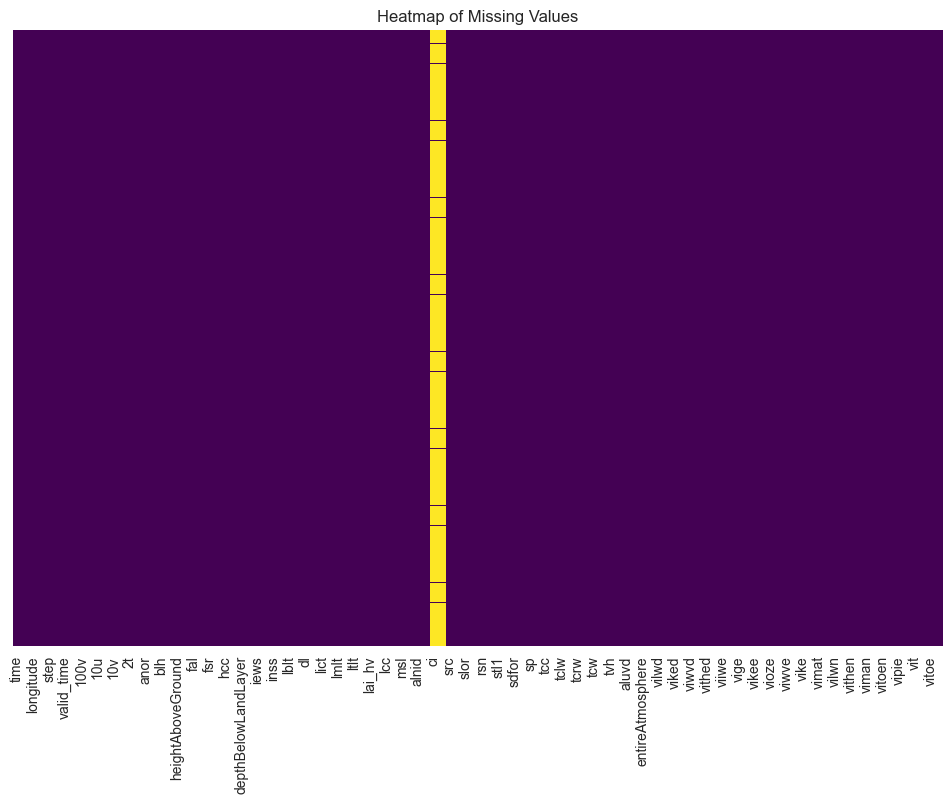

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
missing_values = df.isnull()

plt.figure(figsize=(12, 8))  # Adjust the size as per your dataset
sns.heatmap(missing_values, cbar=False, yticklabels=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()


In [81]:
clean_df = df[df.columns.difference(['ci', 'sst', 'step'])]
clean_df

,100u,100v,10u,10v,2d,2t,alnid,alnip,aluvd,aluvp,...,vithee,vithen,vitoe,vitoed,vitoee,vitoen,viwvd,viwve,viwvn,z
0,-0.398209,-0.315125,-0.350479,-0.030411,257.339905,263.283447,0.172058,0.167019,0.063091,0.061069,...,5.790860e+10,-1.326016e+10,2.547636e+09,-1136.445312,8.030880e+10,-1.594799e+10,-0.000082,36.401855,-26.867432,1710.029785
1,0.145737,-0.059265,-0.079971,0.046738,256.119202,262.658447,0.154434,0.150127,0.053387,0.051731,...,5.738851e+10,-1.300011e+10,2.517195e+09,-699.445312,7.973418e+10,-1.575925e+10,-0.000106,33.151855,-23.179932,2912.729004
2,0.549057,0.033508,0.289169,0.037949,257.390686,262.207275,0.140045,0.135875,0.046200,0.044574,...,5.690197e+10,-1.268135e+10,2.504252e+09,1032.554688,7.919311e+10,-1.550759e+10,-0.000111,29.589355,-18.929932,3335.115723
3,0.633041,0.510071,0.398544,0.347519,257.818420,262.269775,0.136032,0.131252,0.042812,0.041095,...,5.645738e+10,-1.228708e+10,2.495568e+09,952.554688,7.870657e+10,-1.517624e+10,-0.000102,26.214355,-14.679932,3532.229004
4,0.869370,1.017883,0.441513,0.548691,256.105530,262.611572,0.136948,0.130932,0.041408,0.039188,...,5.598761e+10,-1.181732e+10,2.471058e+09,-3191.445312,7.819487e+10,-1.476100e+10,-0.000074,23.214355,-11.242432,4424.393066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7771,3.642746,-2.031570,2.486832,-1.428207,258.056396,267.777588,0.160516,0.154398,0.044276,0.043131,...,9.254017e+10,2.671798e+10,2.499824e+09,3681.753906,1.274701e+11,3.892301e+10,0.000088,140.594238,34.351318,4010.670410
7772,3.118332,-3.256180,1.948746,-2.061996,258.982178,269.482666,0.172922,0.164881,0.053858,0.052012,...,9.240596e+10,2.646003e+10,2.546027e+09,1990.753906,1.273233e+11,3.867555e+10,0.000047,142.875488,35.538818,2091.514160
7773,2.743332,-3.599930,1.703629,-2.262192,258.392334,269.834229,0.169977,0.161326,0.047160,0.045725,...,9.202008e+10,2.643067e+10,2.548485e+09,-1103.246094,1.269249e+11,3.863360e+10,0.000080,145.812988,37.195068,2083.158691
7774,2.945480,-2.873367,1.936050,-1.797348,257.419678,269.650635,0.165064,0.157358,0.043437,0.042261,...,9.189006e+10,2.656489e+10,2.539506e+09,-2175.246094,1.267991e+11,3.873427e+10,0.000093,148.562988,38.788818,2485.561035


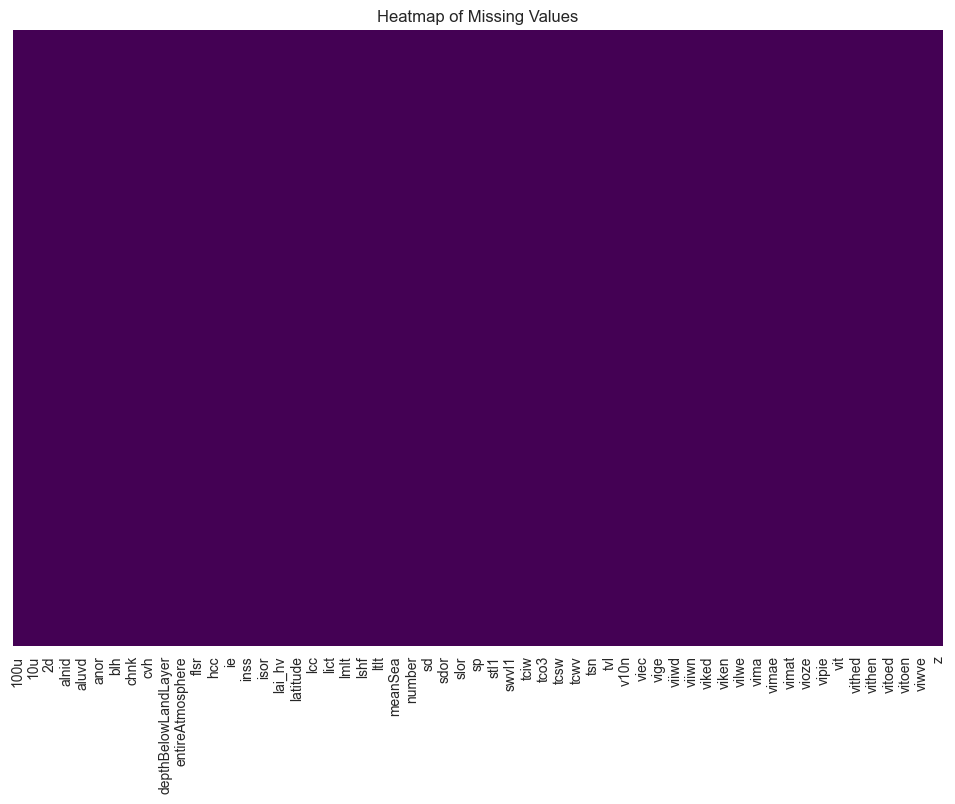

In [82]:
missing_values = clean_df.isnull()

plt.figure(figsize=(12, 8))  # Adjust the size as per your dataset
sns.heatmap(missing_values, cbar=False, yticklabels=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

In [93]:
from sklearn.preprocessing import StandardScaler
values_scaled = StandardScaler().fit_transform(clean_df)
clean_df_scale = pd.DataFrame(values_scaled, columns=clean_df.columns)
clean_df_scale

,100u,100v,10u,10v,2d,2t,alnid,alnip,aluvd,aluvp,...,vithee,vithen,vitoe,vitoed,vitoee,vitoen,viwvd,viwve,viwvn,z
0,-0.925100,-0.109040,-0.894748,-0.023890,-1.523244,-1.851153,-0.521331,-0.312179,1.415344,1.598680,...,0.271339,-0.900804,-0.455988,-0.591454,0.285274,-0.865890,-0.458096,-0.624135,-0.418119,-0.775894
1,-0.751501,0.001080,-0.765096,0.030351,-1.615588,-1.904977,-0.867684,-0.712984,0.655215,0.822316,...,0.250519,-0.882892,-0.756612,-0.367230,0.268767,-0.856035,-0.550063,-0.654457,-0.396899,-0.059116
2,-0.622782,0.041009,-0.588172,0.024172,-1.519402,-1.943830,-1.150464,-1.051152,0.092290,0.227356,...,0.231043,-0.860934,-0.884433,0.521457,0.253223,-0.842896,-0.566617,-0.687695,-0.372441,0.192615
3,-0.595978,0.246117,-0.535749,0.241820,-1.487044,-1.938448,-1.229331,-1.160857,-0.173038,-0.061877,...,0.213245,-0.833777,-0.970187,0.480409,0.239246,-0.825596,-0.534429,-0.719184,-0.347983,0.310090
4,-0.520554,0.464676,-0.515155,0.383257,-1.616623,-1.909013,-1.211338,-1.168460,-0.282994,-0.220449,...,0.194441,-0.801419,-1.212239,-1.645871,0.224546,-0.803916,-0.424988,-0.747174,-0.328201,0.841797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7771,0.364565,-0.847784,0.465142,-1.006634,-1.469042,-1.464132,-0.748156,-0.611643,-0.058397,0.107373,...,1.657662,1.852936,-0.928155,1.880757,1.640099,1.998959,0.200892,0.347978,-0.065818,0.595229
7772,0.197199,-1.374846,0.207244,-1.452230,-1.399007,-1.317295,-0.504359,-0.362905,0.692170,0.845680,...,1.652289,1.835168,-0.471879,1.013107,1.635882,1.986039,0.041789,0.369262,-0.058984,-0.548539
7773,0.077518,-1.522793,0.089762,-1.592980,-1.443628,-1.287020,-0.562235,-0.447266,0.167490,0.323030,...,1.636842,1.833146,-0.447609,-0.574419,1.624435,1.983849,0.169623,0.396669,-0.049453,-0.553519
7774,0.142033,-1.210087,0.201159,-1.266164,-1.517209,-1.302831,-0.658794,-0.541402,-0.124131,0.035064,...,1.631638,1.842391,-0.536276,-1.124461,1.620820,1.989105,0.218365,0.422326,-0.040281,-0.313697


In [94]:
correlation_matrix = clean_df_scale[clean_df_scale.columns.difference(['time', 'valid_time'])].corr()
temperature_correlations = correlation_matrix['2t']

In [95]:
temperature_correlations.apply(lambda r: np.sqrt(r**2)).sort_values(ascending=False)

2t                   1.000000
stl1                 0.983015
skt                  0.977760
2d                   0.910835
lmlt                 0.869121
                       ...   
entireAtmosphere          NaN
heightAboveGround         NaN
meanSea                   NaN
number                    NaN
surface                   NaN
Name: 2t, Length: 111, dtype: float64

In [96]:
from sklearn.ensemble import RandomForestRegressor

# Assuming 'temperature' is your target variable
X = clean_df_scale.drop('2t', axis=1)
y = clean_df_scale['2t']

model = RandomForestRegressor()
model.fit(X, y)

RandomForestRegressor()

In [97]:
feature_importances_all = pd.Series(model.feature_importances_, index=X.columns)
feature_importances_all.sort_values(ascending=False)

stl1                   0.866517
skt                    0.114521
2d                     0.005370
tcw                    0.001680
tcwv                   0.001230
                         ...   
number                 0.000000
heightAboveGround      0.000000
surface                0.000000
meanSea                0.000000
depthBelowLandLayer    0.000000
Length: 112, dtype: float64

In [99]:
import requests

# URL de la page web
url = "https://confluence.ecmwf.int/display/CKB/ERA5%3A+data+documentation#heading-Parameterlistings"

# Récupérer le contenu de la page
response = requests.get(url)
html_content = response.content

# Utiliser pandas pour lire les tables HTML
tables_variable_translation = pd.read_html(html_content)
variables = pd.concat([t for t in tables_variable_translation[4:4+13]])

In [100]:
variables

,count,name,units,Variable name in CDS,shortName,paramId,an,fc,Layer,Range,variable name in CDS,native grid
0,1.0,Lake cover,(0 - 1),lake_cover,cl,26.0,x,x,NaN,NaN,NaN,NaN
1,2.0,Lake depth,m,lake_depth,dl,228007.0,x,x,NaN,NaN,NaN,NaN
2,3.0,Low vegetation cover,(0 - 1),low_vegetation_cover,cvl,27.0,x,NaN,NaN,NaN,NaN,NaN
3,4.0,High vegetation cover,(0 - 1),high_vegetation_cover,cvh,28.0,x,NaN,NaN,NaN,NaN,NaN
4,5.0,Type of low vegetation,~,type_of_low_vegetation,tvl,29.0,x,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
11,12.0,Divergence,s**-1,NaN,d,155.0,x,x,NaN,NaN,NaN,T639 (T319)
12,13.0,Ozone mass mixing ratio,kg kg**-1,NaN,o3,203.0,x,x,NaN,NaN,NaN,N320 (N160)
13,14.0,Specific cloud liquid water content,kg kg**-1,NaN,clwc,246.0,x,x,NaN,NaN,NaN,N320 (N160)
14,15.0,Specific cloud ice water content,kg kg**-1,NaN,ciwc,247.0,x,x,NaN,NaN,NaN,N320 (N160)


In [101]:
nt_variables = variables[variables.units == "K"]
nt_variables[['name', 'shortName']]

,name,shortName
2,Lake mix-layer temperature,lmlt
4,Lake bottom temperature,lblt
5,Lake total layer temperature,ltlt
7,Lake ice temperature,lict
24,Sea surface temperature,sst
25,Ice temperature layer 1,istl1
26,Ice temperature layer 2,istl2
27,Ice temperature layer 3,istl3
28,Ice temperature layer 4,istl4
39,Soil temperature level 11,stl1


In [107]:
clean_df_scale

,100u,100v,10u,10v,2d,2t,alnid,alnip,aluvd,aluvp,...,vithee,vithen,vitoe,vitoed,vitoee,vitoen,viwvd,viwve,viwvn,z
0,-0.925100,-0.109040,-0.894748,-0.023890,-1.523244,-1.851153,-0.521331,-0.312179,1.415344,1.598680,...,0.271339,-0.900804,-0.455988,-0.591454,0.285274,-0.865890,-0.458096,-0.624135,-0.418119,-0.775894
1,-0.751501,0.001080,-0.765096,0.030351,-1.615588,-1.904977,-0.867684,-0.712984,0.655215,0.822316,...,0.250519,-0.882892,-0.756612,-0.367230,0.268767,-0.856035,-0.550063,-0.654457,-0.396899,-0.059116
2,-0.622782,0.041009,-0.588172,0.024172,-1.519402,-1.943830,-1.150464,-1.051152,0.092290,0.227356,...,0.231043,-0.860934,-0.884433,0.521457,0.253223,-0.842896,-0.566617,-0.687695,-0.372441,0.192615
3,-0.595978,0.246117,-0.535749,0.241820,-1.487044,-1.938448,-1.229331,-1.160857,-0.173038,-0.061877,...,0.213245,-0.833777,-0.970187,0.480409,0.239246,-0.825596,-0.534429,-0.719184,-0.347983,0.310090
4,-0.520554,0.464676,-0.515155,0.383257,-1.616623,-1.909013,-1.211338,-1.168460,-0.282994,-0.220449,...,0.194441,-0.801419,-1.212239,-1.645871,0.224546,-0.803916,-0.424988,-0.747174,-0.328201,0.841797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7771,0.364565,-0.847784,0.465142,-1.006634,-1.469042,-1.464132,-0.748156,-0.611643,-0.058397,0.107373,...,1.657662,1.852936,-0.928155,1.880757,1.640099,1.998959,0.200892,0.347978,-0.065818,0.595229
7772,0.197199,-1.374846,0.207244,-1.452230,-1.399007,-1.317295,-0.504359,-0.362905,0.692170,0.845680,...,1.652289,1.835168,-0.471879,1.013107,1.635882,1.986039,0.041789,0.369262,-0.058984,-0.548539
7773,0.077518,-1.522793,0.089762,-1.592980,-1.443628,-1.287020,-0.562235,-0.447266,0.167490,0.323030,...,1.636842,1.833146,-0.447609,-0.574419,1.624435,1.983849,0.169623,0.396669,-0.049453,-0.553519
7774,0.142033,-1.210087,0.201159,-1.266164,-1.517209,-1.302831,-0.658794,-0.541402,-0.124131,0.035064,...,1.631638,1.842391,-0.536276,-1.124461,1.620820,1.989105,0.218365,0.422326,-0.040281,-0.313697


In [112]:
clean_df_nt = clean_df_scale[clean_df_scale.columns.difference(['time', 'valid_time'] + nt_variables.shortName.tolist())]

clean_df_nt

,100u,100v,10u,10v,alnid,alnip,aluvd,aluvp,anor,asn,...,vithee,vithen,vitoe,vitoed,vitoee,vitoen,viwvd,viwve,viwvn,z
0,-0.925100,-0.109040,-0.894748,-0.023890,-0.521331,-0.312179,1.415344,1.598680,-0.455995,0.312311,...,0.271339,-0.900804,-0.455988,-0.591454,0.285274,-0.865890,-0.458096,-0.624135,-0.418119,-0.775894
1,-0.751501,0.001080,-0.765096,0.030351,-0.867684,-0.712984,0.655215,0.822316,-0.243982,0.312311,...,0.250519,-0.882892,-0.756612,-0.367230,0.268767,-0.856035,-0.550063,-0.654457,-0.396899,-0.059116
2,-0.622782,0.041009,-0.588172,0.024172,-1.150464,-1.051152,0.092290,0.227356,0.710765,0.312311,...,0.231043,-0.860934,-0.884433,0.521457,0.253223,-0.842896,-0.566617,-0.687695,-0.372441,0.192615
3,-0.595978,0.246117,-0.535749,0.241820,-1.229331,-1.160857,-0.173038,-0.061877,0.735572,0.312311,...,0.213245,-0.833777,-0.970187,0.480409,0.239246,-0.825596,-0.534429,-0.719184,-0.347983,0.310090
4,-0.520554,0.464676,-0.515155,0.383257,-1.211338,-1.168460,-0.282994,-0.220449,-0.343675,0.312311,...,0.194441,-0.801419,-1.212239,-1.645871,0.224546,-0.803916,-0.424988,-0.747174,-0.328201,0.841797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7771,0.364565,-0.847784,0.465142,-1.006634,-0.748156,-0.611643,-0.058397,0.107373,-0.382856,-0.873577,...,1.657662,1.852936,-0.928155,1.880757,1.640099,1.998959,0.200892,0.347978,-0.065818,0.595229
7772,0.197199,-1.374846,0.207244,-1.452230,-0.504359,-0.362905,0.692170,0.845680,-0.163438,-0.179658,...,1.652289,1.835168,-0.471879,1.013107,1.635882,1.986039,0.041789,0.369262,-0.058984,-0.548539
7773,0.077518,-1.522793,0.089762,-1.592980,-0.562235,-0.447266,0.167490,0.323030,1.765243,0.181726,...,1.636842,1.833146,-0.447609,-0.574419,1.624435,1.983849,0.169623,0.396669,-0.049453,-0.553519
7774,0.142033,-1.210087,0.201159,-1.266164,-0.658794,-0.541402,-0.124131,0.035064,2.357582,0.194253,...,1.631638,1.842391,-0.536276,-1.124461,1.620820,1.989105,0.218365,0.422326,-0.040281,-0.313697


In [105]:
correlation_matrix = clean_df_nt.corr()
temperature_correlations = correlation_matrix['2t']

KeyError: '2t'

In [57]:
temperature_correlations.apply(lambda r: np.sqrt(r**2)).sort_values(ascending=False)

t2m                  1.000000
p65.162              0.835240
p75.162              0.825861
msl                  0.824366
p69.162              0.823459
                       ...   
entireAtmosphere          NaN
heightAboveGround         NaN
meanSea                   NaN
number                    NaN
surface                   NaN
Name: t2m, Length: 102, dtype: float64

In [41]:
from sklearn.ensemble import RandomForestRegressor

# Assuming 'temperature' is your target variable
X = clean_df_nt.drop('t2m', axis=1)
y = clean_df_nt['t2m']

model = RandomForestRegressor()
model.fit(X, y)

RandomForestRegressor()

In [42]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False)

tcwv                   0.667428
p73.162                0.109655
tcw                    0.052014
blh                    0.032306
ie                     0.030877
                         ...   
entireAtmosphere       0.000000
p87.162                0.000000
depthBelowLandLayer    0.000000
surface                0.000000
heightAboveGround      0.000000
Length: 101, dtype: float64